# Seaborn
Seaborn is a visualization library built on top of `matplotlib`. 
It is created to simplify the plotting of some complex statistical data, which would be very difficult in `matplotlib`.
![Seaborn vs Matplotlib](images/seaborn-vs-matplotlib.png)

## Seaborn Relationship Plot
Seaborn Relationship Plot or `relplot` is a scatter plot which shows relationship between 2 varaibles

### Lets see this in action

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
countries = pd.read_csv('datasets/countries-gdp.csv')
countries.head()

,country,code,population,gdp_per_capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


### Lets plot relation between Population of country and gdp per capita

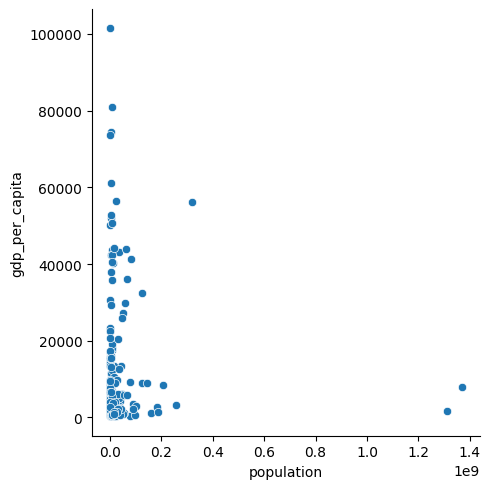

In [3]:
sns.relplot(data=countries, x='population', y='gdp_per_capita')
plt.show()

So we see a scatter plot, but there is no conclusive relationship between population.  
There are countries with High population and very low GDP per capita, and there are countries with low population but high and low gdp per capita

### Lets plots athlete's height and weigh and see if there is any relationship

In [4]:
athletes = pd.read_csv('datasets/athletes.csv', index_col=0)
athletes.head()

,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
id,,,,,,,,,,
736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


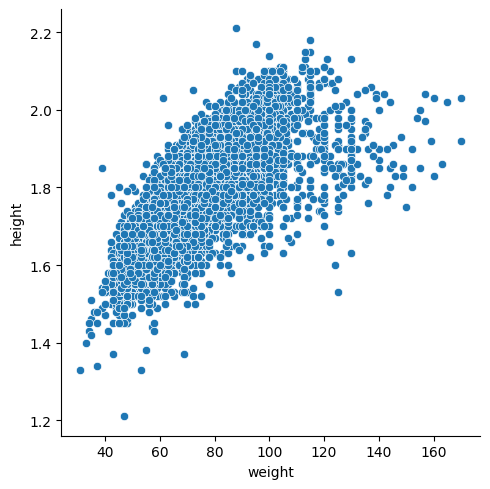

In [5]:
sns.relplot(data=athletes, x='weight', y='height')
plt.show()

#### So yeah, there is some direct relation in weight and heigh of athletes. 
#### Lets try to see different colors for sex. This can be achieved using `hue` parameter

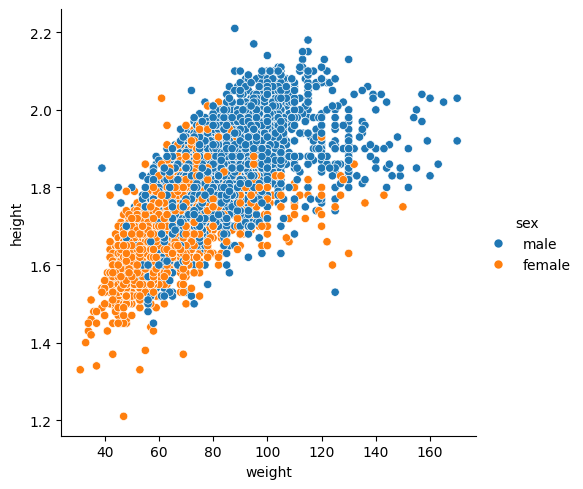

In [6]:
sns.relplot(data=athletes, x='weight', y='height', hue='sex')
plt.show()

Nice... We can also use sports the athlete play as a hue

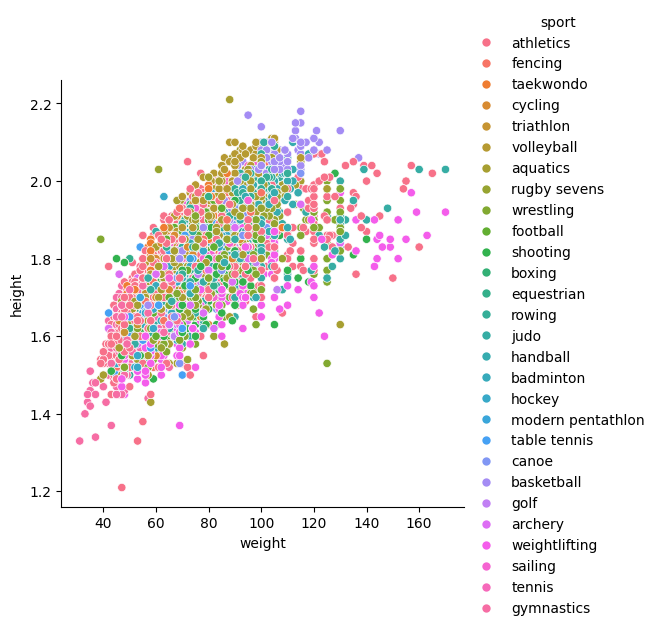

In [7]:
sns.relplot(data=athletes, x='weight', y='height', hue='sport')
plt.show()

## Seaborn Catagorical Plots
Categorical plots are plots where one of the variable is catagorical valued

### Lets plot the tips a waiter/waitress is getting on specific days

In [8]:
tips = sns.load_dataset('datasets/tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


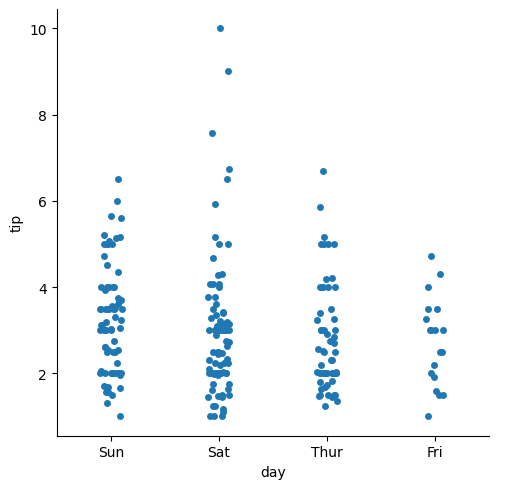

In [9]:
sns.catplot(data=tips, x='day', y='tip')
plt.show()

We can use `swarm` plot to avoid overlapping data

/home/freak/Freak/Trainings/PY-VISUALIZATION/.venv/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


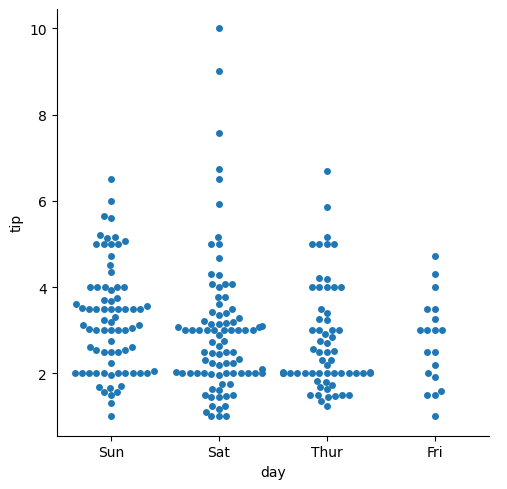

In [10]:
sns.catplot(data=tips, x='day', y='tip', kind='swarm')
plt.show()

### Lets differencite by waiter's gender

/home/freak/Freak/Trainings/PY-VISUALIZATION/.venv/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


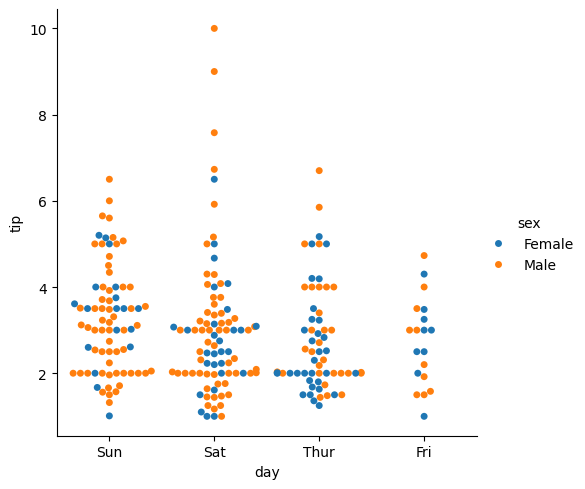

In [11]:
sns.catplot(data=tips, x='day', y='tip', kind='swarm', hue='sex')
plt.show()

### If we want to work with summary, we can also plot box plots here

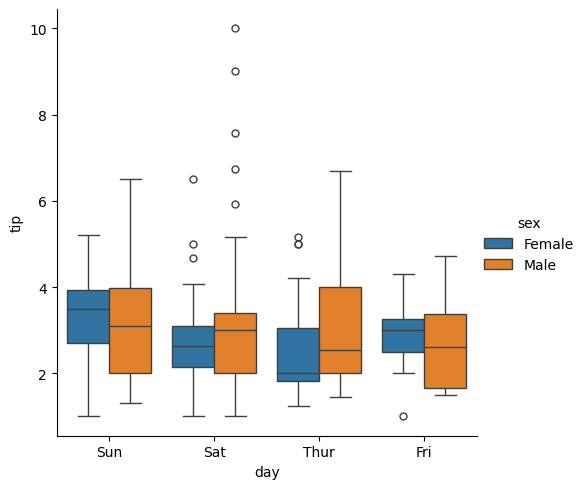

In [12]:
sns.catplot(data=tips, x='day', y='tip', kind='box', hue='sex')
plt.show()

### Or Violin plot

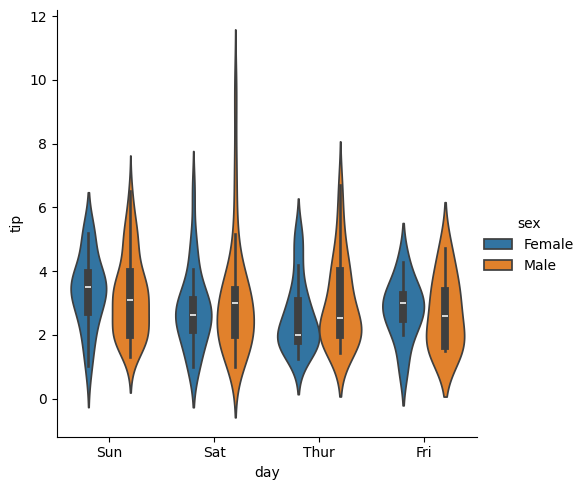

In [13]:
sns.catplot(data=tips, x='day', y='tip', kind='violin', hue='sex')
plt.show()

## Seaborn Distribution Plot
If we want to analyse data distribution in single data variable of dataset, we can either use `histplot` which is histogram or `kdeplot` which is kernel density estimation, it is smoothened histogram

## Lets try to see the distribution of total amount of bills

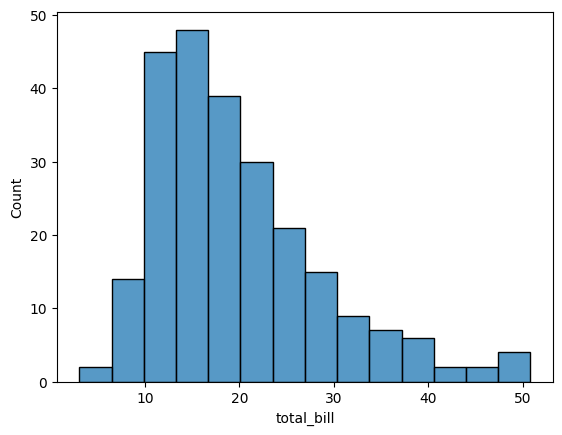

In [14]:
sns.histplot(data=tips.total_bill)
plt.show()

### See the KDE of this data

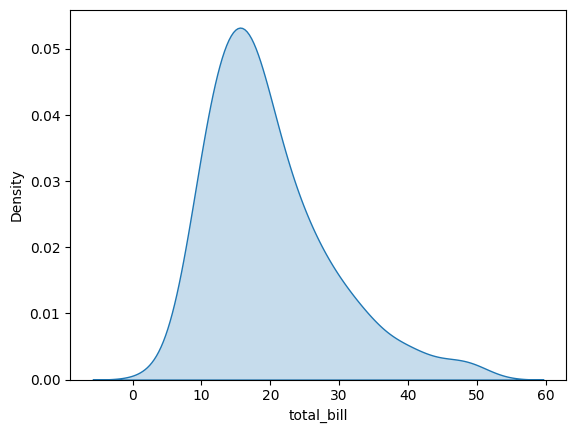

In [15]:
sns.kdeplot(data=tips.total_bill, fill=True)
plt.show()

## We can combine Histogram and KDE informtaion in single plot

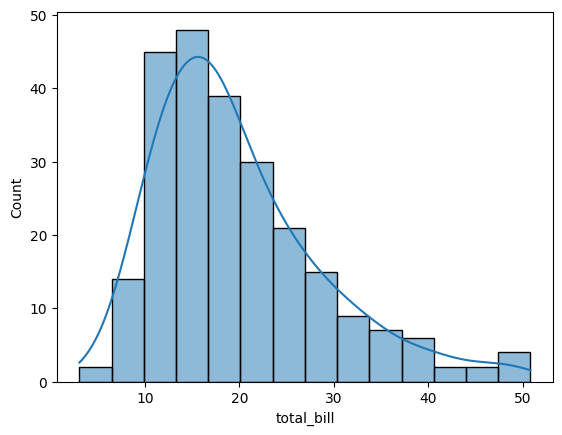

In [16]:
sns.histplot(data=tips.total_bill, kde=True)
plt.show()

## Bivariate Plot
### Seaborn also allow us to plot 2 data points distribution
#### Lets try to see distribution of Total bill, Tip amount and their relations

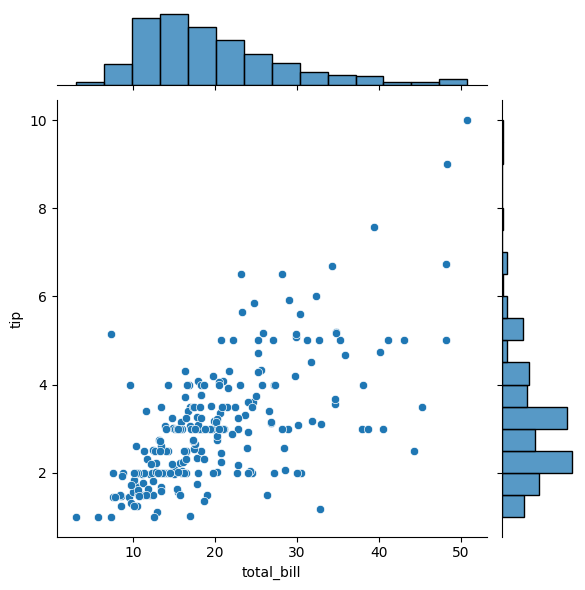

In [17]:
sns.jointplot(data=tips, x='total_bill', y='tip')

### How about KDE

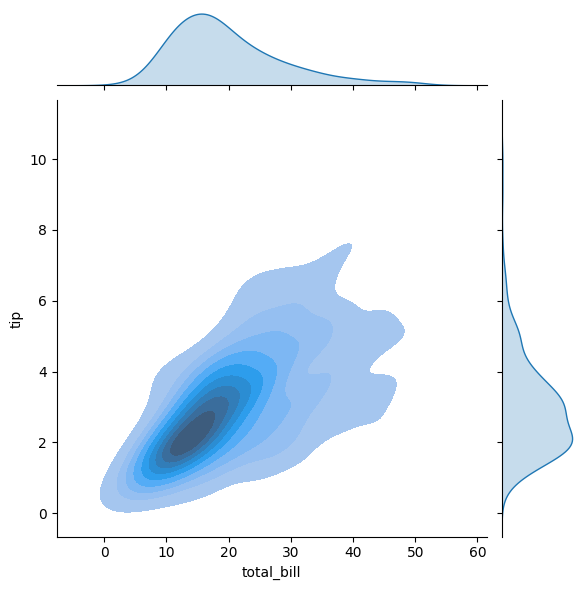

In [18]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind="kde", fill=True)
plt.show()

## Aesthetics

### We can use matplotlib to control aesthetics of Seaborn Plots as seaborn is built on top of matplot lib

#### Lets plot most played sports by atheletes

<Axes: xlabel='sport', ylabel='count'>

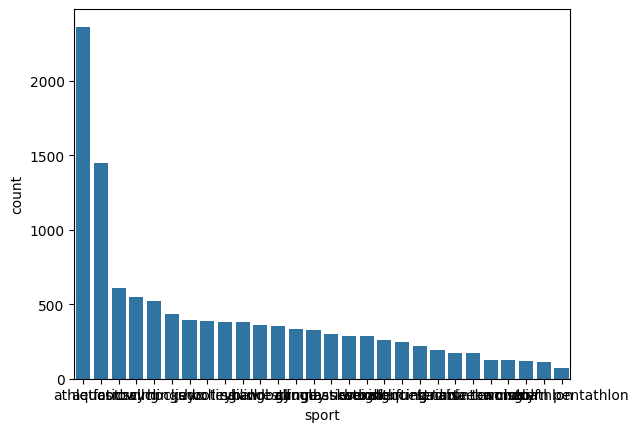

In [19]:
sns.countplot(data=athletes, x='sport', order=athletes.sport.value_counts().index)

### So we can set the asthetics using matplotlib

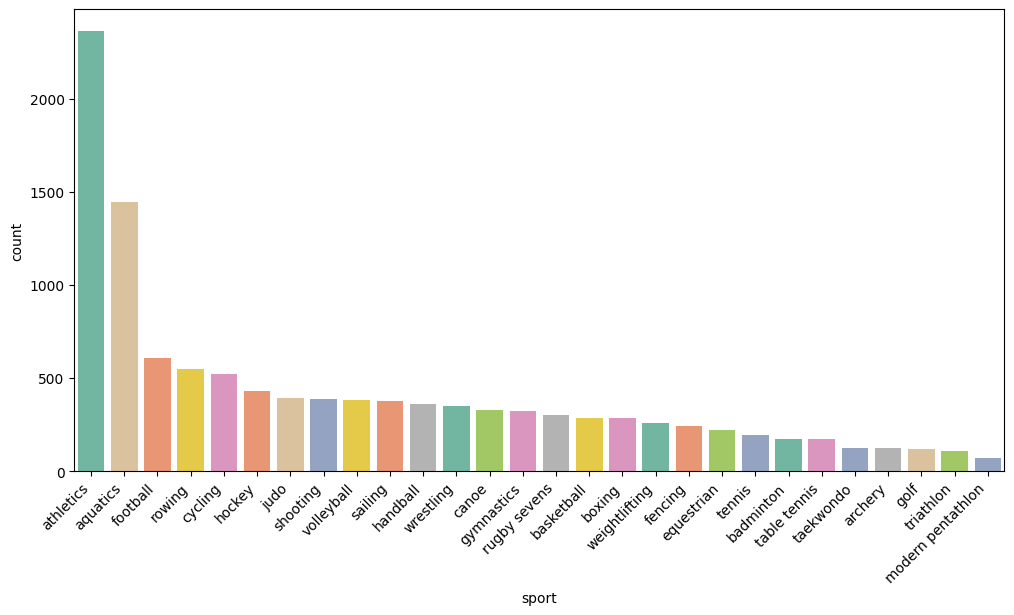

In [20]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation = 45, horizontalalignment='right')
sns.countplot(data=athletes, x='sport', order=athletes.sport.value_counts().index, hue='sport', palette='Set2')
plt.show()

### Sometime we can also use Seaborn built in height and aspect for scaling figure

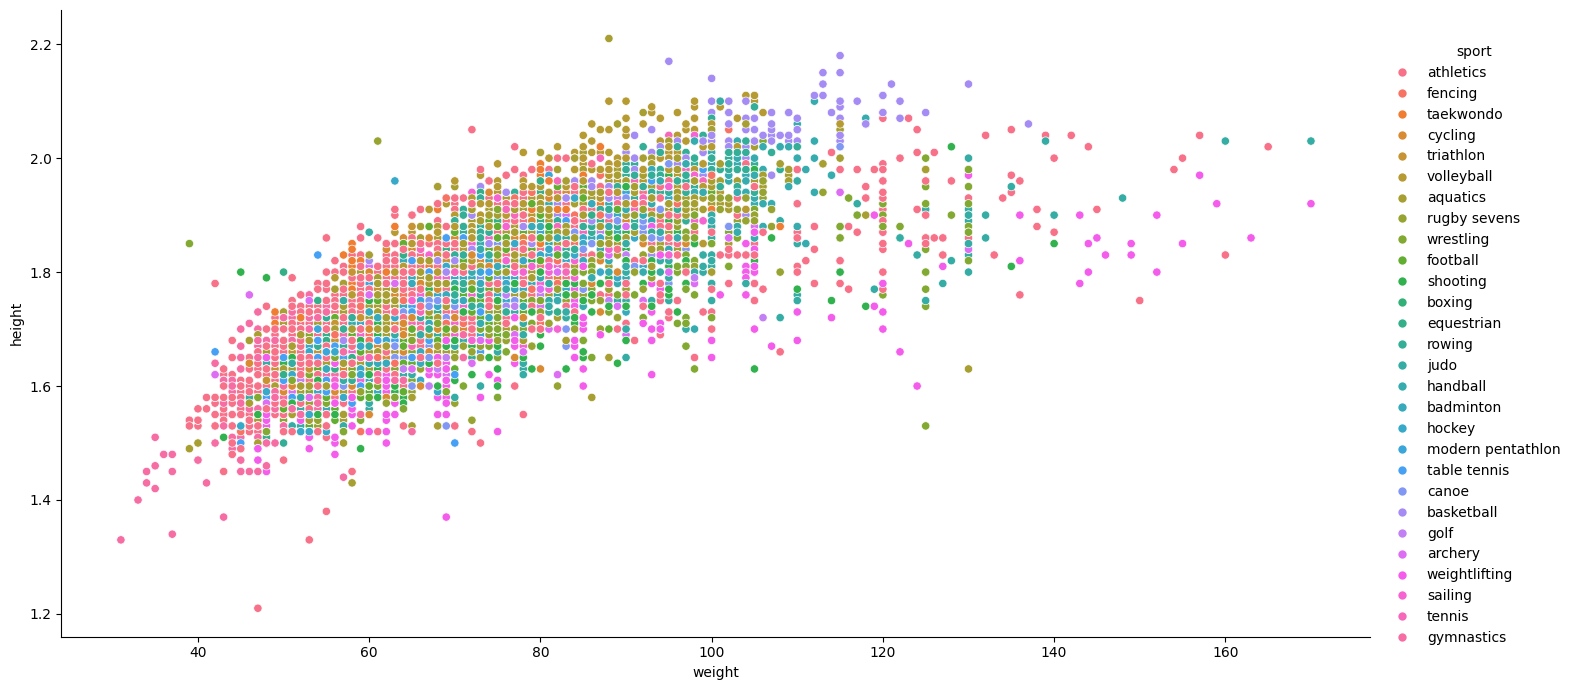

In [21]:
sns.relplot(data=athletes, x='weight', y='height', hue='sport', height=7, aspect=2)
plt.show()